# Prediction of the electrical consumption needs of buildings

# Content
- [Context of the problem](#Context-of-the-problem)
- [Pre-exploratory stage: General analysis and discovery of the files](#Pre-exploratory-stage:-General-analysis-and-discovery-of-the-files)
- [Exploratory analysis and data cleaning](#Exploratory-analysis-and-data-cleaning)
- [Pickling the cleaned data frame](#Pickling-the-cleaned-data-frame)

## Context of the problem

The project consists on creating data based strategies for the city of Seattle in the USA. To achieve the goal of a carbon-neutral city by 2050, the team is paying close attention to emissions from non-residential buildings. Consumption data can be downloaded at this address https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv.

Predictions will be based on the declarative data of the commercial operating permit (size and use of buildings, mention of recent work, date of construction, etc.) 
We are also interested to assess the value of the "ENERGY STAR Score" for predicting emissions, which is tedious to calculate with the approach currently used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

We have two data files corresponding to the years of 2015 and 2016. We will explore them:

## Pre-exploratory stage: General analysis and discovery of the files

### Description of 2015 data file:

In [2]:
data_file_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')

In [3]:
print("The file contains {} rows and {} columns".format(data_file_2015.shape[0],data_file_2015.shape[1]))

The file contains 3340 rows and 47 columns


In [4]:
print(data_file_2015.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [5]:
data_file_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

### Description of 2016 data file:

In [6]:
data_file_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [7]:
print("The file contains {} rows and {} columns".format(data_file_2016.shape[0],data_file_2015.shape[1]))

The file contains 3376 rows and 47 columns


In [8]:
print(data_file_2016.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [9]:
data_file_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

### Comparison between 2015 and 2016 data files:

We will verify now if the data files from 2015 and 2016 have the same shape.

In [10]:
list_data_file_2015 = list(data_file_2015)
list_data_file_2016 = list(data_file_2016)

In [11]:
list_data_file_2016 == list_data_file_2015

False

The datafiles from years 2015 and 2016 are different. To verify which columns are different:

In [12]:
# Code extracted from https://stackoverflow.com/questions/50203732/compare-column-names-of-pandas-dataframe

def comparison_columns_data_files(data_file_A, data_file_B):
    data_file_A_column = data_file_A.columns
    data_file_B_column = data_file_B.columns

    common_columns = data_file_A_column.intersection(data_file_B_column) # common columns between data frames
    data_file_A_not_in_data_file_B = data_file_A_column.difference(data_file_B_column) # Columns that are in 2015 data file that are not in 2016 data file
    data_file_B_not_in_data_file_A = data_file_B_column.difference(data_file_A_column) # Columns that are in 2016 data file that are not in 2015 data file

    return (common_columns, data_file_A_not_in_data_file_B, data_file_B_not_in_data_file_A)

In [13]:
comparison_columns_data_files(data_file_2015, data_file_2016)

(Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
        'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
        'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
        'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
        'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
        'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
        'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
        'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
        'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
        'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
        'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
        'DefaultData', 'ComplianceStatus', 'Outlier'],
       dtype='object'),
 Index(['2010 Census Tracts', 'City Council Distr

We will have a look at the column 'Location' from the 2015 data file.

In [14]:
data_file_2015['Location']

0       {'latitude': '47.61219025', 'longitude': '-122...
1       {'latitude': '47.61310583', 'longitude': '-122...
2       {'latitude': '47.61334897', 'longitude': '-122...
3       {'latitude': '47.61421585', 'longitude': '-122...
4       {'latitude': '47.6137544', 'longitude': '-122....
                              ...                        
3335    {'latitude': '47.59950256', 'longitude': '-122...
3336    {'latitude': '47.65752471', 'longitude': '-122...
3337    {'latitude': '47.61649845', 'longitude': '-122...
3338    {'latitude': '47.68396954', 'longitude': '-122...
3339    {'latitude': '47.68396954', 'longitude': '-122...
Name: Location, Length: 3340, dtype: object

As we observe from the 2015 data file, Location column contains information about the latitude and longitude coordinates, which are present as columns in the 2016 data file. We will separate the information contained in 'Location' column o obtain the latitude and longitude information in order to put it into two separate columns.

In [15]:
# See reference code at https://www.kaggle.com/marcbourgeois/p-lec-01-cleaning
import ast
data_file_2015['Location'] = [ast.literal_eval(str(item)) for index, item in data_file_2015.Location.iteritems()]
data_file_2015 = pd.concat([data_file_2015.drop(['Location'], axis=1), data_file_2015['Location'].apply(pd.Series)], axis=1)
data_file_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in data_file_2015.human_address.iteritems()]
data_file_2015 = pd.concat([data_file_2015.drop(['human_address'], axis=1), data_file_2015['human_address'].apply(pd.Series)], axis=1)
data_file_2015[['longitude', 'latitude']] = data_file_2015[['longitude', 'latitude']].apply(pd.to_numeric) 

In [16]:
data_file_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 52 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   CouncilDistrictCode                                            3340 non-null   int64  
 7   Neighborhood                                                

In [17]:
data_file_2015[['longitude', 'latitude']] = data_file_2015[['longitude', 'latitude']].apply(pd.to_numeric) 

### Revision of data files variables

As the mission of the project is regarding the CO2 emissions, we should pay special atention to the variables 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'GHGEmissionsIntensity' and 'TotalGHGEmissions'.

As described at https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy, we have:

* **The variable 'GHGEmissionsIntensity' or 'GHGEmissionsIntensity(kgCO2e/ft2)'**, is the total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources.

* **The variable 'TotalGHGEmissions' or 'GHGEmissions(MetricTonsCO2e)'**, is the total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

In [18]:
data_file_2015['GHGEmissions(MetricTonsCO2e)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [19]:
data_file_2016['TotalGHGEmissions'].describe()      

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [20]:
data_file_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [21]:
data_file_2016['GHGEmissionsIntensity'].describe()


count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

The variables 'GHGEmissionsIntensity(kgCO2e/ft2)' and 'GHGEmissionsIntensity' are of the same order of magnitud, as for the variables 'GHGEmissions(MetricTonsCO2e)' and 'TotalGHGEmissions'. We are going to rename these variables, plus the variables 'ZipCode' and 'Zip Codes', and we are going to use the variables names from the 2016 data file.

In [22]:
new_df_2015 = data_file_2015.copy()

In [23]:
new_df_2015 = new_df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                  'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                  'Zip Codes':'ZipCode',
                                  'latitude':'Latitude',
                                  'longitude':'Longitude',
                                  'address':'Address'})

In order to keep only the variables that we are going to use in further analyses, we will have a look first at the meaning of all the common variables of the 2015 and 2016 data files. As previously mentioned, the description of the variables is at https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy.
We will indicate here the variables relevant to our mission.

* **OSEBuildingID**: A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.
* **DataYear**: Calendar year (January-December) represented by each data record.
* **BuildingType**: City of Seattle building type classification (e.g. Nonresidential, Multifamily).
* **PrimaryPropertyType**: The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.
* **ZipCode, Latitude, Longitude and Address**: Property zip code, latitude and longitude coordinates, and physical address.
* **Neighborhood**: Property neighborhood area defined by the City of Seattle Department of Neighborhoods.
* **YearBuilt**: Year in which a property was constructed or underwent a complete renovation.
 

Regarding energy performance of buildings we have:

ENERGY STAR® is a joint program of the Environmental Protection Agency (EPA) and the Department of Energy (DOE). Its goal is to help consumers, businesses, and industry save money and protect the environment through the adoption of energy-efficient products and practices. (See ref. https://www.energy.gov/eere/buildings/energy-starr#:~:text=ENERGY%20STAR%C2%AE%20is%20a,energy%2Defficient%20products%20and%20practices).

Thus we have the following columns.

* **ENERGYSTARScore**: An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.
* **SiteEUI(kBtu/sf)**: Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.
* **SourceEUI(kBtu/sf)**: Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.
* **SiteEnergyUse(kBtu)**: The annual amount of energy consumed by the property from all sources of energy.
* **Electricity(kBtu)**: The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).
* **NaturalGas(kBtu)**: The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu). 

**Although the terms 'electricity' and 'energy' are often used interchangeably, it's important to understand that electricity is just one component of total energy consumption. The same logic applies to 'natural gas', which can be used to calculate the total energy consumption and green house gasses emissions. Energy describes the work and heat available from all energy carriers, from the point of supply to consumption; whereas electricity is only one of these carriers. The energy carriers which supply the world today are predominantly: fossil fuels, biofuels, nuclear fuels, the wind and solar radiation. So why is this distinction important? Presently only a small fraction of the energy supplied and consumed worldwide is carried by electricity, approximately 11% and 20% respectively in the UK (assuming that hydro, wind, nuclear and solar energy are converted to electricity at the point of supply) whereas the majority of the energy supply and demand is carried by fossil fuels. Also, the commercial sector uses natural gas to heat buildings and water, to operate refrigeration and cooling equipment, to cook, to dry clothes, and to provide outdoor lighting. Some consumers in the commercial sector also use natural gas as a fuel in combined heat and power systems.**

https://www.eia.gov/energyexplained/natural-gas/use-of-natural-gas.php

See reference: https://www.cambridgeconsultants.com/insights/energy-versus-electricity#:~:text=Energy%20describes%20the%20work%20and,the%20wind%20and%20solar%20radiation.

There are two types of EUI: site and source. Site EUI is the amount of heat and electricity a buildings consumes as reflected in utility bills. Source EUI traces heat and electricity use back to the original raw input creating a more holistic understanding of a building's energy use.


Other columns:

* **NumberofBuildings**: Number of buildings included in the property's report. In cases where a property is reporting as a campus, multiple buildings may be included in one report.
* **NumberofFloors**: Number of floors reported in Portfolio Manager.
* **PropertyGFATotal**: Total building and parking gross floor area.
* **PropertyGFABuilding(s)**: Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.

Generally, the gross floor area is the sum of the floor areas of the spaces within the building, including basements, mezzanine and intermediate-floored tiers, and penthouses with headroom height of 7.5 ft (2.2 meters) or greater.

We are starting te removal of some columns from the data files of 2015 and 2016 that we are not going to use in further analysis.

In [24]:
new_df_2015 = new_df_2015.drop(columns=['2010 Census Tracts', 'City Council Districts', 'Comment', 'OtherFuelUse(kBtu)', 'SPD Beats',
                                'Seattle Police Department Micro Community Policing Plan Areas', 'ZipCode', 'city', 'state', 'zip'])

In [25]:
new_df_2016 = data_file_2016.copy()

In [26]:
new_df_2016 = new_df_2016.drop(columns=['City', 'Comments', 'ZipCode', 'State'])

We will compare now if the two data frames have the same columns. If so, we will proceed to create a new data frame for each year with the variables that we will consider as relevant now based on the variables descriptions shown previously.

In [27]:
comparison_columns_data_files(new_df_2015,new_df_2016)

(Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
        'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
        'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
        'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
        'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
        'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
        'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
        'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
        'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
        'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
        'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
        'TotalGHGEmissions', 'GHGEmissionsIntensity', 'DefaultData',
        'ComplianceStatus', 'Outlier', 'Latitude', 'Longitu

### Selection of relevant columns for the creation of new data frame with 2015 and 2016 data files

In [28]:
columns_for_analyses = ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'Latitude', 'Longitude', 'Address', 'Neighborhood', 'YearBuilt', 
                        'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'NumberofBuildings', 'NumberofFloors',
                        'PropertyGFATotal', 'PropertyGFABuilding(s)', 'GHGEmissionsIntensity', 'TotalGHGEmissions', 'Electricity(kBtu)', 'NaturalGas(kBtu)']

In [29]:
new_data_frame_2015 = new_df_2015.copy()

In [30]:
data_subset_2015 = new_data_frame_2015[columns_for_analyses]

In [31]:
data_subset_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Latitude,Longitude,Address,Neighborhood,YearBuilt,ENERGYSTARScore,...,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions,Electricity(kBtu),NaturalGas(kBtu)
0,1,2015,NonResidential,Hotel,47.612190,-122.337997,405 OLIVE WAY,DOWNTOWN,1927,65.0,...,173.5,6981428.0,1,12.0,88434,88434,2.64,249.43,3686160.0,1272388.0
1,2,2015,NonResidential,Hotel,47.613106,-122.333358,724 PINE ST,DOWNTOWN,1996,51.0,...,191.3,8354235.0,1,11.0,103566,88502,2.38,263.51,3905411.0,4448985.0
2,3,2015,NonResidential,Hotel,47.613349,-122.337699,1900 5TH AVE,DOWNTOWN,1969,18.0,...,242.7,73130656.0,1,41.0,961990,961990,1.92,2061.48,49762435.0,3709900.0
3,5,2015,NonResidential,Hotel,47.614216,-122.336609,620 STEWART ST,DOWNTOWN,1926,1.0,...,636.3,28229320.0,1,10.0,61320,61320,31.38,1936.34,2769023.0,2001894.0
4,8,2015,NonResidential,Hotel,47.613754,-122.340924,401 LENORA ST,DOWNTOWN,1980,67.0,...,228.8,14829099.0,1,18.0,119890,107430,4.02,507.70,6066245.0,8763105.0


In [32]:
new_data_frame_2016 = new_df_2016.copy()

In [33]:
data_subset_2016 = new_data_frame_2016[columns_for_analyses]

In [34]:
data_subset_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Latitude,Longitude,Address,Neighborhood,YearBuilt,ENERGYSTARScore,...,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions,Electricity(kBtu),NaturalGas(kBtu)
0,1,2016,NonResidential,Hotel,47.61220,-122.33799,405 Olive way,DOWNTOWN,1927,60.0,...,182.500000,7226362.5,1.0,12,88434,88434,2.83,249.98,3946027.0,1276453.0
1,2,2016,NonResidential,Hotel,47.61317,-122.33393,724 Pine street,DOWNTOWN,1996,61.0,...,176.100006,8387933.0,1.0,11,103566,88502,2.86,295.86,3242851.0,5145082.0
2,3,2016,NonResidential,Hotel,47.61393,-122.33810,1900 5th Avenue,DOWNTOWN,1969,43.0,...,241.899994,72587024.0,1.0,41,956110,759392,2.19,2089.28,49526664.0,1493800.0
3,5,2016,NonResidential,Hotel,47.61412,-122.33664,620 STEWART ST,DOWNTOWN,1926,56.0,...,216.199997,6794584.0,1.0,10,61320,61320,4.67,286.43,2768924.0,1811213.0
4,8,2016,NonResidential,Hotel,47.61375,-122.34047,401 LENORA ST,DOWNTOWN,1980,75.0,...,211.399994,14172606.0,1.0,18,175580,113580,2.88,505.01,5368607.0,8803998.0


### Revision of duplicated values data frame for 2015

We will check at the duplicate values by looking at the variable 'OSEBuildingID'.

In [35]:
print ("The number of duplicate values in the variable 'OSEBuildingID' of 2015 data frame is: {}".format(data_subset_2015.duplicated(subset=['OSEBuildingID']).sum()))

The number of duplicate values in the variable 'OSEBuildingID' of 2015 data frame is: 0


### Revision of duplicated values data frame for 2016

In [36]:
print ("The number of duplicate values in the variable 'OSEBuildingID' of 2016 data frame is: {}".format(data_subset_2016.duplicated(subset=['OSEBuildingID']).sum()))

The number of duplicate values in the variable 'OSEBuildingID' of 2016 data frame is: 0


### Creation of new data frame according to relevant variables

We will create now a new data frame that contains the union between 2015 and 2016 data, so that we can perform our analysis.

In [37]:
new_df_both_years = pd.concat([data_subset_2015[data_subset_2016.columns],data_subset_2016], axis = 0, ignore_index=True).sort_values(["DataYear", "OSEBuildingID"])

In [38]:
new_df_both_years.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Latitude,Longitude,Address,Neighborhood,YearBuilt,ENERGYSTARScore,...,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions,Electricity(kBtu),NaturalGas(kBtu)
0,1,2015,NonResidential,Hotel,47.612190,-122.337997,405 OLIVE WAY,DOWNTOWN,1927,65.0,...,173.5,6981428.0,1.0,12.0,88434,88434,2.64,249.43,3686160.0,1272388.0
1,2,2015,NonResidential,Hotel,47.613106,-122.333358,724 PINE ST,DOWNTOWN,1996,51.0,...,191.3,8354235.0,1.0,11.0,103566,88502,2.38,263.51,3905411.0,4448985.0
2,3,2015,NonResidential,Hotel,47.613349,-122.337699,1900 5TH AVE,DOWNTOWN,1969,18.0,...,242.7,73130656.0,1.0,41.0,961990,961990,1.92,2061.48,49762435.0,3709900.0
3,5,2015,NonResidential,Hotel,47.614216,-122.336609,620 STEWART ST,DOWNTOWN,1926,1.0,...,636.3,28229320.0,1.0,10.0,61320,61320,31.38,1936.34,2769023.0,2001894.0
4,8,2015,NonResidential,Hotel,47.613754,-122.340924,401 LENORA ST,DOWNTOWN,1980,67.0,...,228.8,14829099.0,1.0,18.0,119890,107430,4.02,507.70,6066245.0,8763105.0


In [39]:
print("The data frame for both years with the relevant variables contains {} rows and {} columns".format(new_df_both_years.shape[0],new_df_both_years.shape[1]))

The data frame for both years with the relevant variables contains 6716 rows and 21 columns


## Exploratory analysis and data cleaning

### Revision of missing values

We need to know how many columns have more than 40% of missing values.

In [40]:
nan_values = 100 * new_df_both_years.isna().sum() / len(new_df_both_years) 
print ("The number of columns whose missing values are bigger than 40% is: {}".format(len(nan_values[nan_values > 40])))

The number of columns whose missing values are bigger than 40% is: 0


The next function creates a graph that shows the NaN values in each column of the dataframe passed to the function.

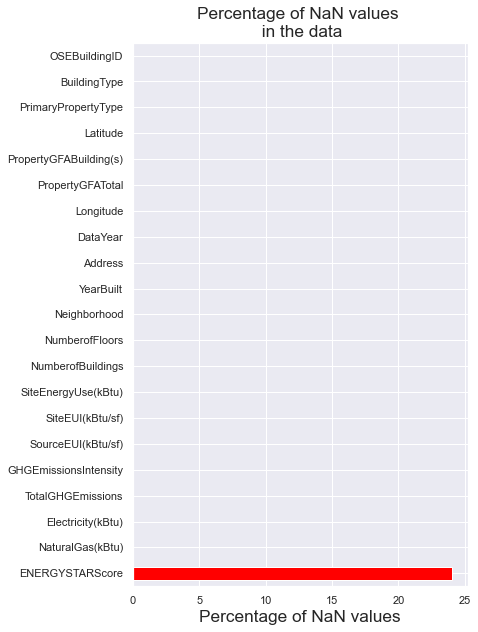

In [41]:
def graph_nan_values_per_column(data, size):

    nan_values = 100 * data.isna().sum() / len(data) 
    nan_values = nan_values.sort_values(ascending=False)
    nan_values = nan_values.astype(int)
    ax_nan_values = nan_values.plot(kind='barh', figsize=size, color='red')
    ax_nan_values.set_xlabel("Percentage of NaN values", fontsize='x-large')
    ax_nan_values.set_title("Percentage of NaN values \n in the data",fontsize='x-large')
graph_nan_values_per_column(new_df_both_years, (6,10))

In [42]:
new_df_both_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 6715
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OSEBuildingID           6716 non-null   int64  
 1   DataYear                6716 non-null   int64  
 2   BuildingType            6716 non-null   object 
 3   PrimaryPropertyType     6716 non-null   object 
 4   Latitude                6716 non-null   float64
 5   Longitude               6716 non-null   float64
 6   Address                 6716 non-null   object 
 7   Neighborhood            6716 non-null   object 
 8   YearBuilt               6716 non-null   int64  
 9   ENERGYSTARScore         5093 non-null   float64
 10  SiteEUI(kBtu/sf)        6699 non-null   float64
 11  SourceEUI(kBtu/sf)      6697 non-null   float64
 12  SiteEnergyUse(kBtu)     6701 non-null   float64
 13  NumberofBuildings       6708 non-null   float64
 14  NumberofFloors          6708 non-null   

### Exploratory analysis for data cleaning

Since we are mainly interested in the emissions of non-residential buildings, we are going to eliminate those values corresponding to residential buildings. For this we use the 'BuildingType' variable.

In [43]:
new_df_both_years['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [44]:
new_df_both_years = new_df_both_years[~new_df_both_years['BuildingType'].str.contains("Multifamily")]
new_df_both_years['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

With 'SPS-District K-12' being related to Seattle Public Schools.

<AxesSubplot:xlabel='count', ylabel='BuildingType'>

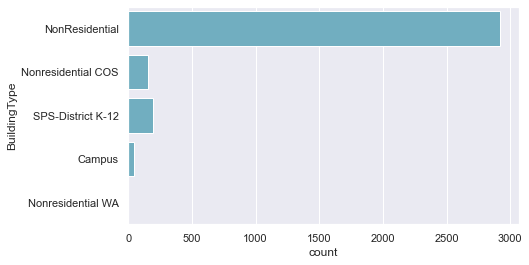

In [45]:
plt.subplots(figsize=(7, 4))
sns.countplot(y="BuildingType", data=new_df_both_years, color="c")

We are going to look at the 'PrimaryPropertyType'variable.

In [46]:
new_df_both_years = new_df_both_years[~(new_df_both_years['PrimaryPropertyType'].str.contains("Residence Hall"))
                                        & ~(new_df_both_years['PrimaryPropertyType'].str.contains("Multifamily"))]
new_df_both_years['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
       'Retail Store', 'Senior Care Community', 'Medical Office',
       'Hospital', 'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'Restaurant\n', 'Restaurant',
       'University', 'Warehouse', 'Supermarket / Grocery Store', 'Office'],
      dtype=object)

<AxesSubplot:xlabel='count', ylabel='PrimaryPropertyType'>

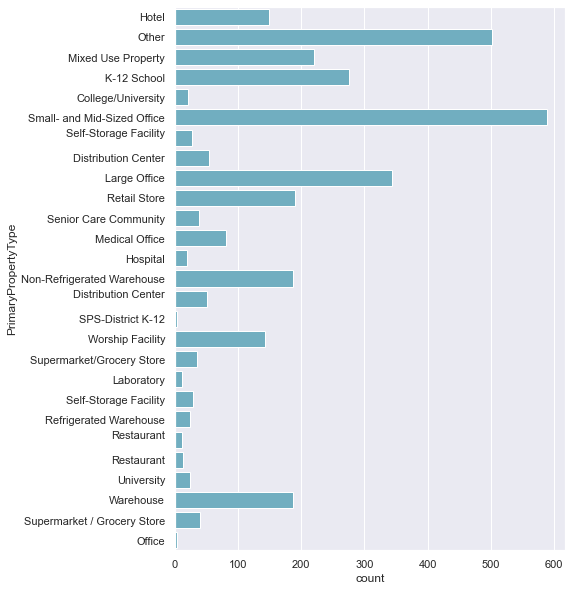

In [47]:
plt.subplots(figsize=(7, 10))
sns.countplot(y="PrimaryPropertyType", data=new_df_both_years, color="c")

We will look at the 'Neighborhood' column as well.

In [48]:
new_df_both_years['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE', 'Central',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

As we observed, 'DELRIDGE NEIGHBORHOODS' can be replaced with just 'DELRIDGE' denomination, so we keep unique values.

In [49]:
new_df_both_years['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
new_df_both_years['Neighborhood'] = new_df_both_years['Neighborhood'].map(lambda x: x.upper())

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

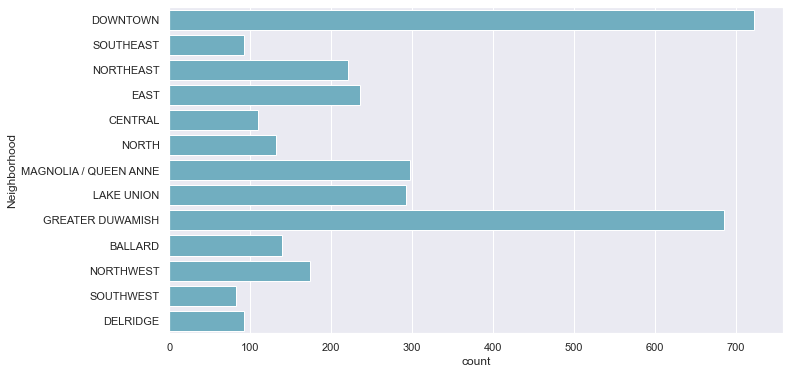

In [50]:
sns.countplot(y="Neighborhood", data=new_df_both_years, color="c")

In [51]:
new_df_both_years.describe()

,OSEBuildingID,DataYear,Latitude,Longitude,YearBuilt,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions,Electricity(kBtu),NaturalGas(kBtu)
count,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,2178.000000,3267.000000,3268.000000,3.268000e+03,3275.000000,3269.000000,3.277000e+03,3.277000e+03,3268.000000,3268.000000,3.268000e+03,3.268000e+03
mean,15837.746109,2015.501678,47.615669,-122.333179,1961.625877,64.851699,71.808877,176.094553,8.132269e+06,1.119084,4.130009,1.163565e+05,1.029435e+05,1.479465,178.259636,5.684194e+06,1.888383e+06
std,13382.344255,0.500073,0.048244,0.024593,32.654121,28.590074,72.727703,181.678648,2.540420e+07,2.233578,6.599019,2.525498e+05,2.354197e+05,2.224835,670.454794,1.751138e+07,7.945861e+06
min,1.000000,2015.000000,47.499170,-122.411820,1900.000000,1.000000,0.000000,-2.000000,0.000000e+00,0.000000,0.000000,1.128500e+04,-5.055000e+04,-0.020000,-0.800000,-1.154170e+05,0.000000e+00
25%,576.000000,2015.000000,47.585090,-122.343400,1930.000000,47.000000,33.299999,76.200000,1.221320e+06,1.000000,1.000000,2.963600e+04,2.858400e+04,0.270000,19.677500,7.251178e+05,0.000000e+00
50%,21116.000000,2016.000000,47.612170,-122.333160,1965.000000,72.500000,51.600000,131.550000,2.515115e+06,1.000000,2.000000,4.929900e+04,4.760200e+04,0.770000,49.060000,1.633868e+06,4.787845e+05
75%,24536.000000,2016.000000,47.648671,-122.322110,1989.000000,89.000000,81.900001,205.824998,6.992292e+06,1.000000,4.000000,1.047860e+05,9.447200e+04,1.732500,139.265000,4.904434e+06,1.476731e+06
max,50226.000000,2016.000000,47.733870,-122.258640,2015.000000,100.000000,834.400024,2620.000000,8.739237e+08,111.000000,99.000000,9.320156e+06,9.320156e+06,34.090000,16870.980000,6.570744e+08,2.979090e+08


As we observed in the previous table, different columns have negative values. Those are 'SourceEUI(kBtu/sf)', 'PropertyGFABuilding(s)', 'GHGEmissionsIntensity' and 'TotalGHGEmissions'. We will eliminate the negative vaules.

In [52]:
new_df_both_years = new_df_both_years[(new_df_both_years['SourceEUI(kBtu/sf)']  >= 0) 
                                                & (new_df_both_years['PropertyGFABuilding(s)']  >= 0)
                                                & (new_df_both_years['GHGEmissionsIntensity']  >= 0)
                                                & (new_df_both_years['TotalGHGEmissions']  >= 0)
                                                & (new_df_both_years['Electricity(kBtu)']  >= 0)
                                                & (new_df_both_years['NaturalGas(kBtu)']  >= 0)]

In [53]:
new_df_both_years.describe()

,OSEBuildingID,DataYear,Latitude,Longitude,YearBuilt,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions,Electricity(kBtu),NaturalGas(kBtu)
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,2175.000000,3263.000000,3264.000000,3.264000e+03,3264.000000,3256.000000,3.264000e+03,3.264000e+03,3264.000000,3264.000000,3.264000e+03,3.264000e+03
mean,15795.184436,2015.502757,47.615612,-122.333191,1961.614583,64.819310,71.860619,176.214522,8.140474e+06,1.119485,4.135442,1.166324e+05,1.032215e+05,1.481186,178.466786,5.689539e+06,1.890697e+06
std,13356.316020,0.500069,0.048214,0.024565,32.657469,28.589906,72.752940,181.733647,2.541865e+07,2.237329,6.610639,2.530108e+05,2.358332e+05,2.225653,670.839394,1.752138e+07,7.950454e+06
min,1.000000,2015.000000,47.499170,-122.411820,1900.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.128500e+04,3.636000e+03,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,574.750000,2015.000000,47.585050,-122.343428,1930.000000,47.000000,33.299999,76.275000,1.222924e+06,1.000000,1.000000,2.963475e+04,2.858550e+04,0.270000,19.715000,7.255212e+05,0.000000e+00
50%,21111.500000,2016.000000,47.612115,-122.333160,1965.000000,72.000000,51.600000,131.600003,2.518779e+06,1.000000,2.000000,4.968000e+04,4.767950e+04,0.780000,49.105000,1.634550e+06,4.793245e+05
75%,24532.000000,2016.000000,47.648653,-122.322146,1989.000000,89.000000,81.950001,206.250000,6.996959e+06,1.000000,4.000000,1.050708e+05,9.455325e+04,1.740000,139.350000,4.920563e+06,1.481258e+06
max,50226.000000,2016.000000,47.733870,-122.258640,2015.000000,100.000000,834.400024,2620.000000,8.739237e+08,111.000000,99.000000,9.320156e+06,9.320156e+06,34.090000,16870.980000,6.570744e+08,2.979090e+08


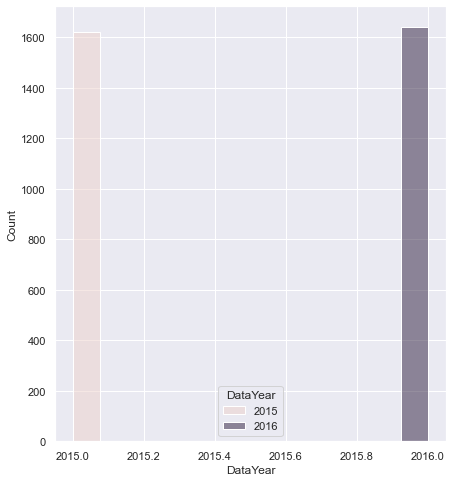

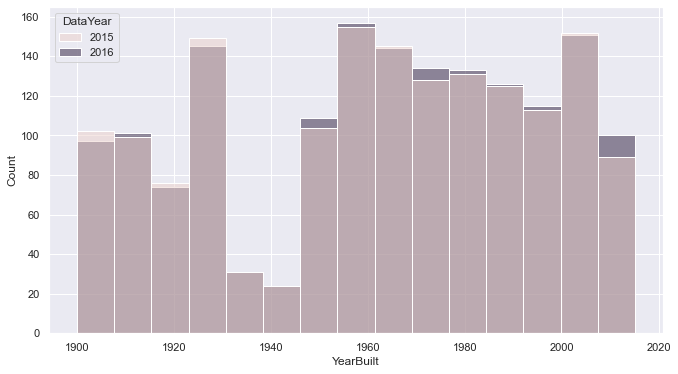

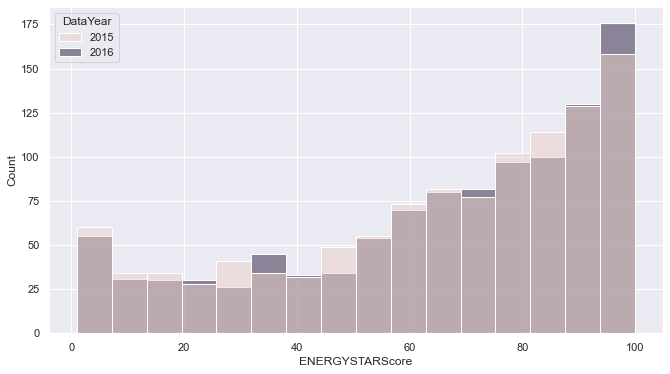

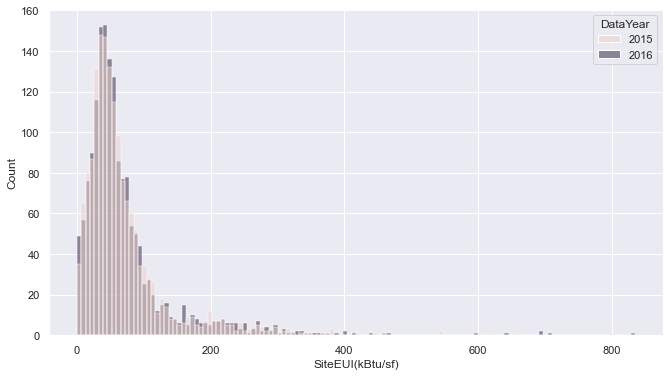

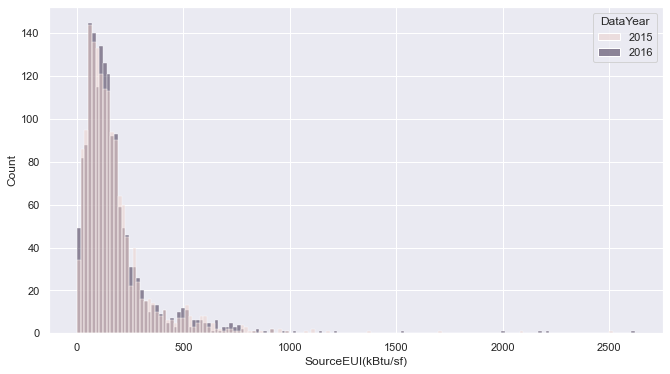

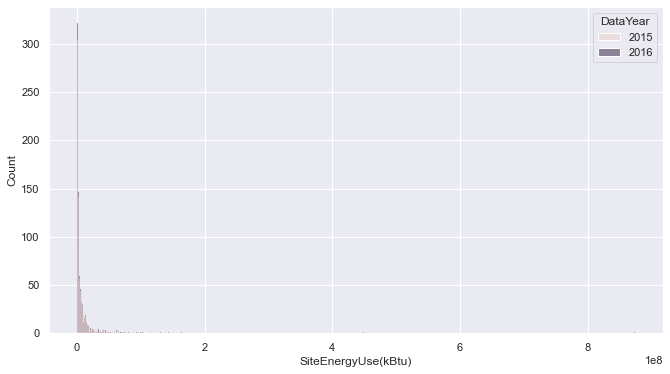

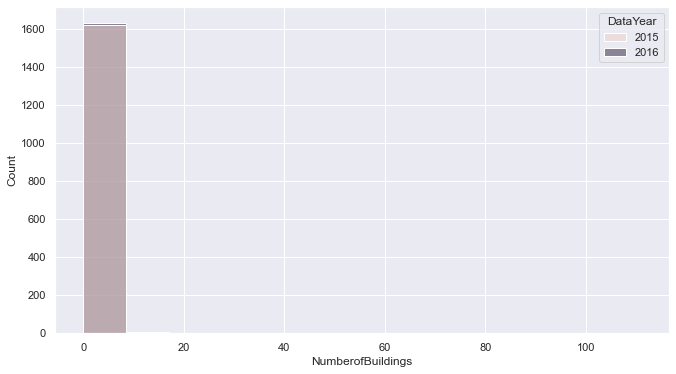

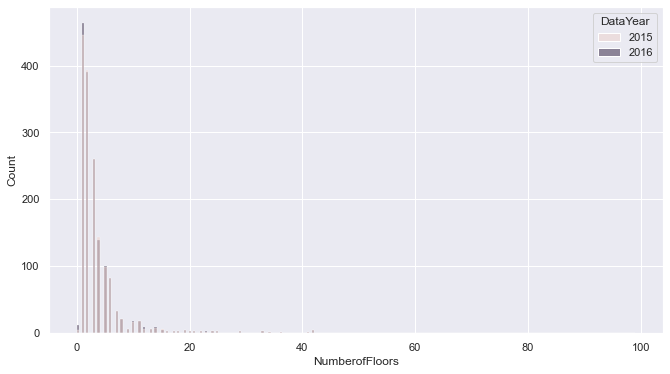

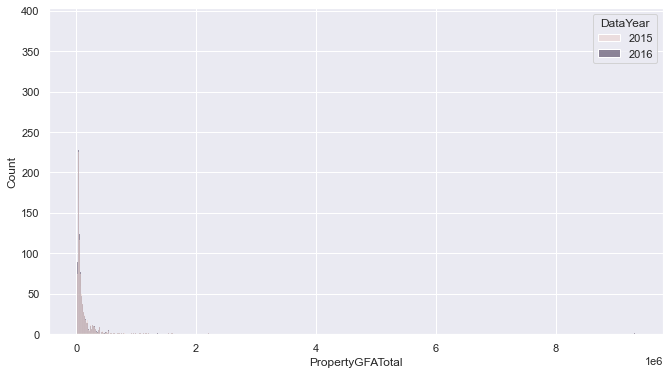

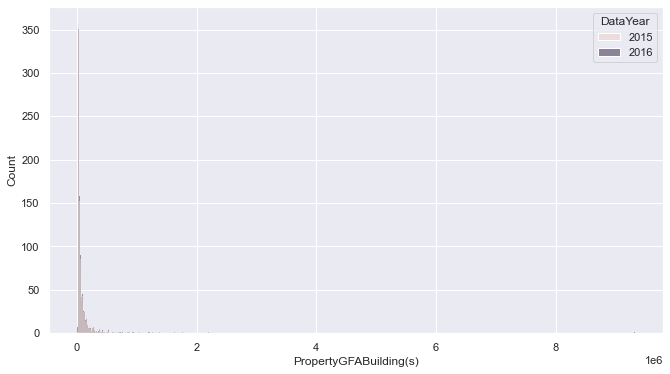

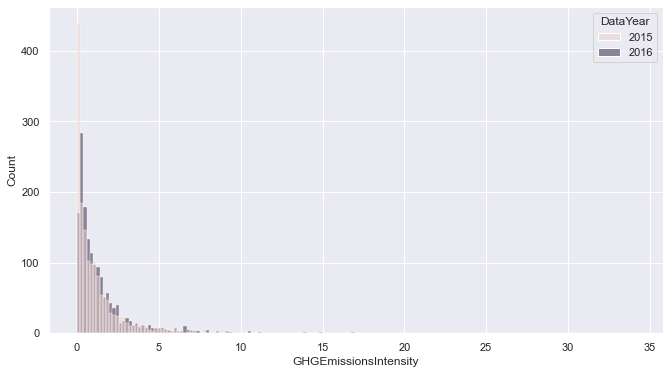

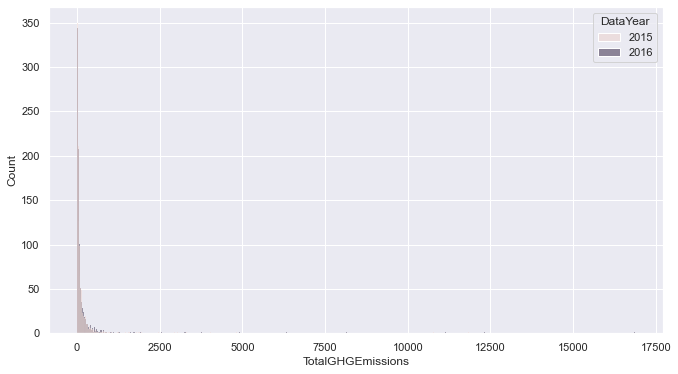

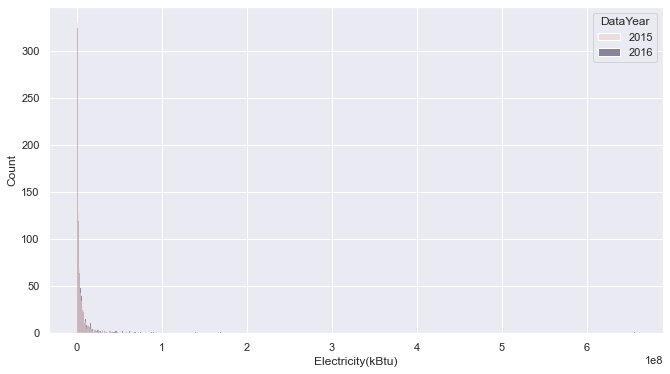

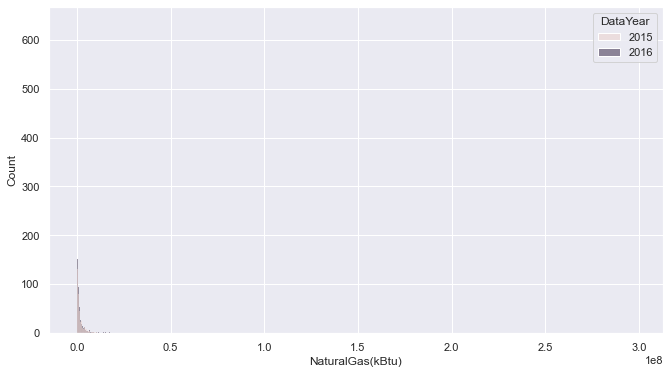

In [54]:
plt.subplots(figsize=(7, 8))

columns_to_drop_in_histogram=['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'OSEBuildingID', 'Latitude', 'Longitude', 'Address']

for i in new_df_both_years.columns:
    if i not in columns_to_drop_in_histogram:
        sns.histplot(data=new_df_both_years, x=i, color="cyan", hue="DataYear")
        plt.show()

In [55]:
# # See reference code at https://www.kaggle.com/marcbourgeois/p-lec-01-cleaning
# import folium
# map_osm = folium.Map()
# map_osm = folium.Map(location=[new_df_both_years['Latitude'].mean(), new_df_both_years['Longitude'].mean()], zoom_start=11, width=1000, height=1000, control_scale=True)
# for i in range(0,len(new_df_both_years)):
#     folium.Circle([new_df_both_years.iloc[i]['Latitude'],new_df_both_years.iloc[i]['Longitude']], 
#                       popup=new_df_both_years.iloc[i]['Address'], radius =100, color='red').add_to(map_osm)
# map_osm

In [56]:
print("The data frame with more clean data contains {} rows and {} columns".format(new_df_both_years.shape[0],new_df_both_years.shape[1]))

The data frame with more clean data contains 3264 rows and 21 columns


## Pickling the cleaned data frame

After cleaning and filtering our data we pickle the already cleaned and filtered data frame. Pickle is used for serializing and de-serializing Python object structures, also called marshalling or flattening. Serialization refers to the process of converting an object in memory to a byte stream that can be stored on disk or sent over a network. Later on, this character stream can then be retrieved and de-serialized back to a Python object. For more details, consult references:

In [57]:
# To pickle the data frame

new_df_both_years.to_pickle("./pickle_data_cleaned.pkl")